In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV
from helper import *
from plotting import plot

In [16]:
reader = Reader()
svd_data = pd.read_csv('data/data.csv')
data = Dataset.load_from_df(svd_data, reader)
data_train  = data.build_full_trainset()
algo = SVD(n_factors=10, n_epochs=300, biased=False, lr_all = 0.005, reg_all = 0)
algo.fit(data_train)

# reader = Reader()
# svd_data = pd.read_csv('data/data.csv')
# data = Dataset.load_from_df(svd_data, reader)
# data_train  = data.build_full_trainset()
# param_grid = {'n_factors': [factor for factor in range(10, 130, 30)], 'lr_all': [0.002, 0.005, 0.001],
#               'reg_all': [0, 0.1, 0.2, 0.4, 0.6]}

# algo = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

# algo.fit(data)

# # best RMSE score
# print(algo.best_score['rmse'])

# # combination of parameters that gave the best RMSE score
# print(algo.best_params['rmse'])

In [17]:
V = algo.qi.transpose()
V = mean_center_rows(V)
A = np.linalg.svd(V)[0]
V_proj = np.dot(A[:, :2].transpose(), V)
V_proj /= V_proj.std(axis=1).reshape(2, 1)

In [18]:
ten_popular = get_most_popular()[:10]
ten_best = get_highest_rated()[:10]
choice = get_choice_of_movies()
comedy = get_comedy_movies()
musical = get_musical_movies()
scifi = get_scifi_movies()

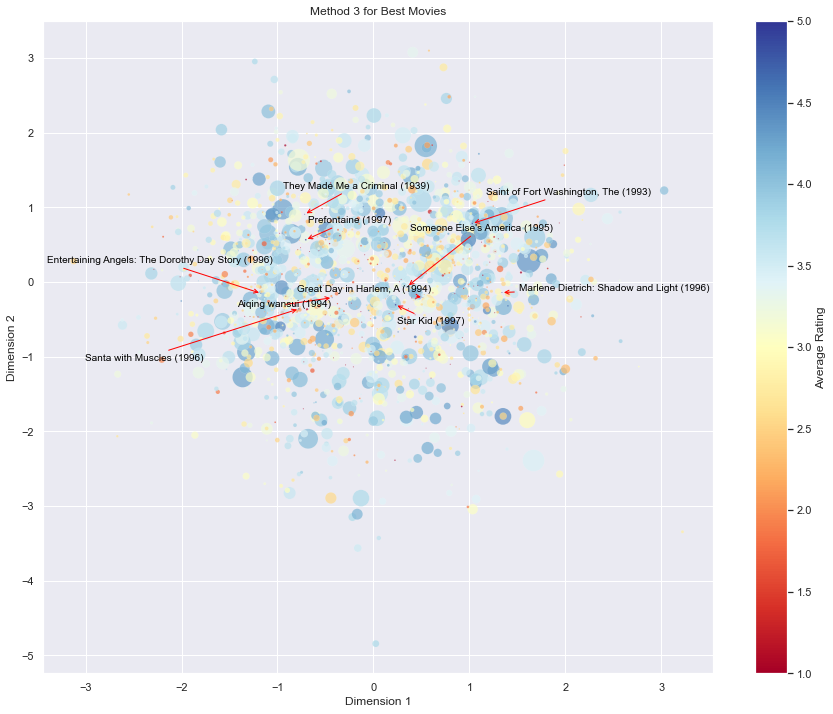

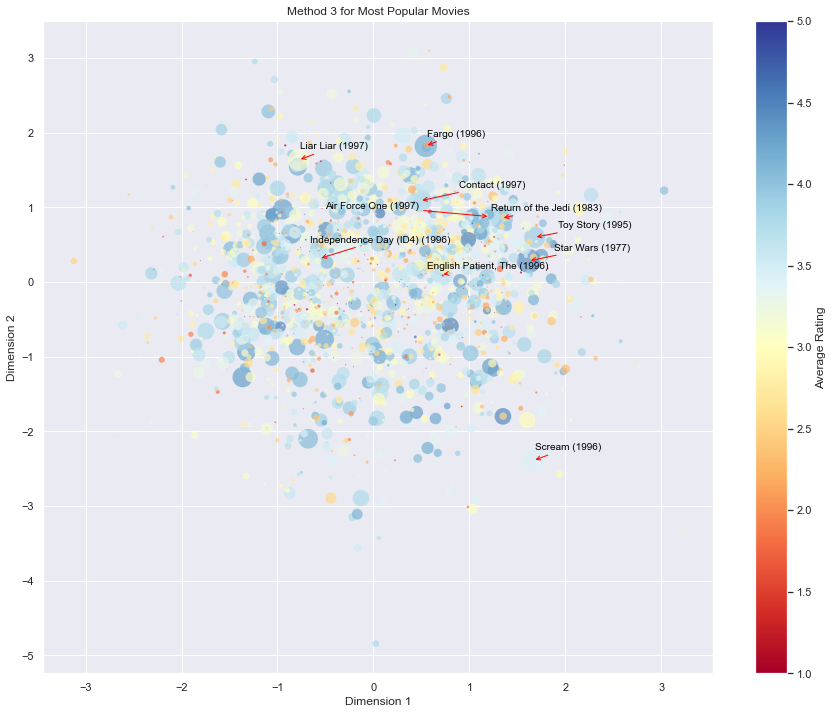

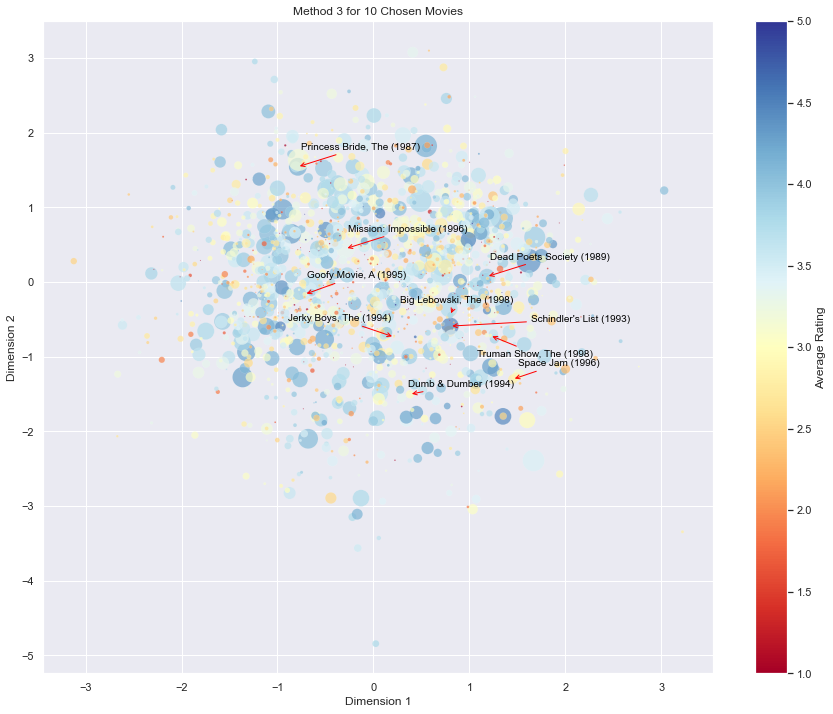

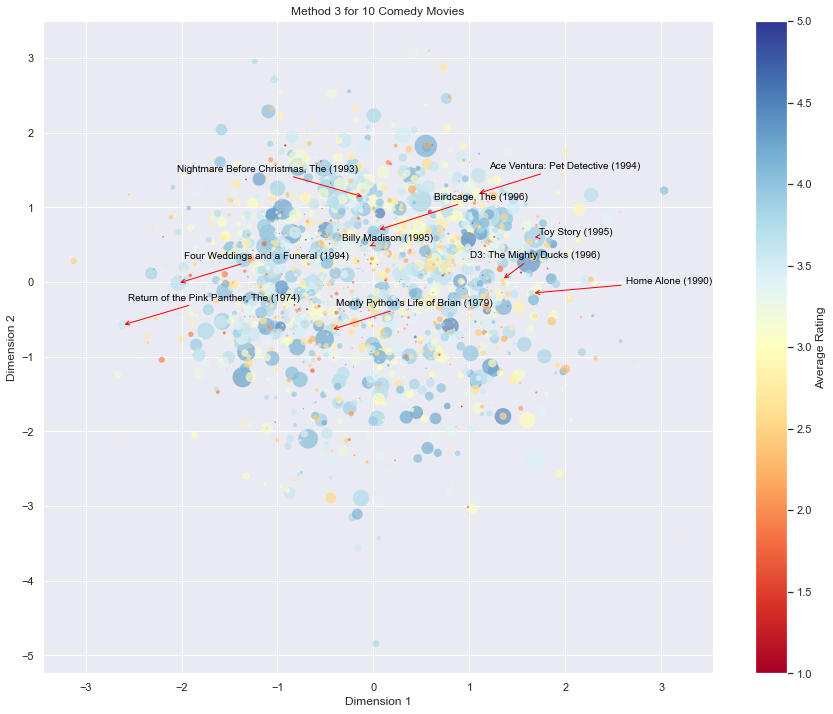

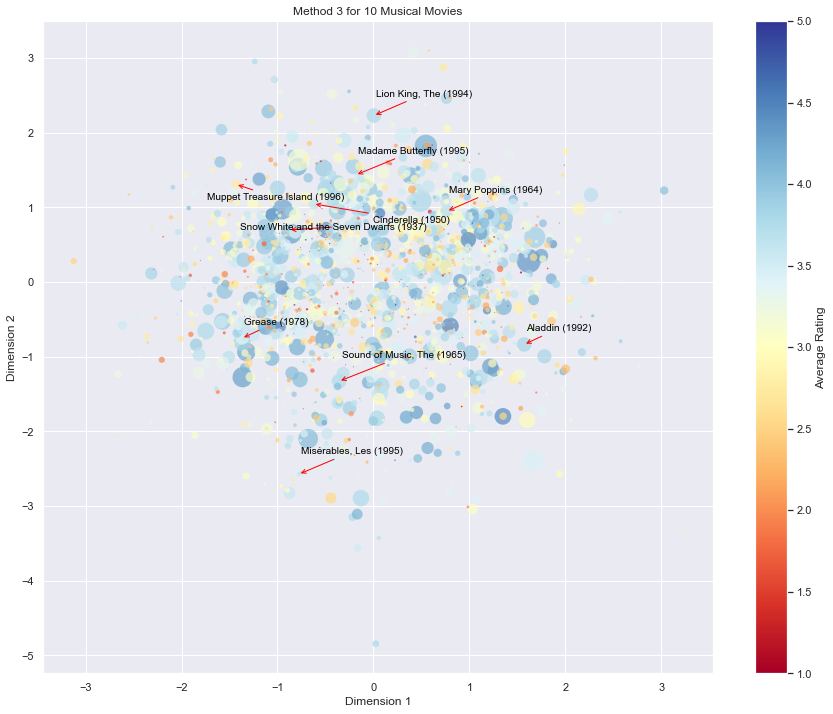

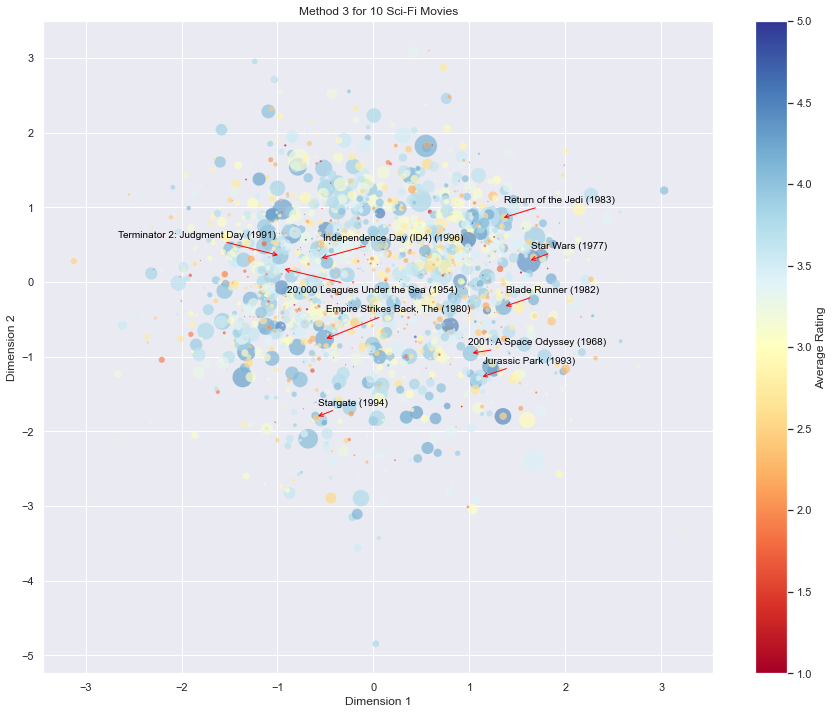

In [19]:
plot(V_proj, ten_best, 'Method 3 for Best Movies')
plot(V_proj, ten_popular, 'Method 3 for Most Popular Movies')
plot(V_proj, choice, 'Method 3 for 10 Chosen Movies')
plot(V_proj, comedy, 'Method 3 for 10 Comedy Movies')
plot(V_proj, musical, 'Method 3 for 10 Musical Movies')
plot(V_proj, scifi, 'Method 3 for 10 Sci-Fi Movies')